# naive_bayes  on salary data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df1= pd.read_csv("SalaryData_Train.csv")
df2=pd.read_csv("SalaryData_Test.csv")

In [3]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
df1.isnull().sum()


In [5]:
df2.isnull().sum()


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
df1.shape


(30161, 14)

In [7]:
df2.shape


(15060, 14)

In [8]:
df1.describe()


,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df2.describe()


,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [10]:
df1['maritalstatus'].value_counts()


maritalstatus
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: count, dtype: int64

In [11]:
df2['maritalstatus'].value_counts()


maritalstatus
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: count, dtype: int64

In [12]:
df1['Salary'].value_counts()


Salary
 <=50K    22653
 >50K      7508
Name: count, dtype: int64

In [13]:
df2['Salary'].value_counts()


Salary
 <=50K    11360
 >50K      3700
Name: count, dtype: int64

In [14]:
#for df1
object_variables1 = df1.select_dtypes(include=['object'])
print(object_variables1)


               workclass    education        maritalstatus  \
0              State-gov    Bachelors        Never-married   
1       Self-emp-not-inc    Bachelors   Married-civ-spouse   
2                Private      HS-grad             Divorced   
3                Private         11th   Married-civ-spouse   
4                Private    Bachelors   Married-civ-spouse   
...                  ...          ...                  ...   
30156            Private   Assoc-acdm   Married-civ-spouse   
30157            Private      HS-grad   Married-civ-spouse   
30158            Private      HS-grad              Widowed   
30159            Private      HS-grad        Never-married   
30160       Self-emp-inc      HS-grad   Married-civ-spouse   

               occupation    relationship    race      sex          native  \
0            Adm-clerical   Not-in-family   White     Male   United-States   
1         Exec-managerial         Husband   White     Male   United-States   
2       Handlers-clea

In [15]:
#for df2
object_variables2= df2.select_dtypes(include=['object'])
print(object_variables2)


           workclass      education        maritalstatus          occupation  \
0            Private           11th        Never-married   Machine-op-inspct   
1            Private        HS-grad   Married-civ-spouse     Farming-fishing   
2          Local-gov     Assoc-acdm   Married-civ-spouse     Protective-serv   
3            Private   Some-college   Married-civ-spouse   Machine-op-inspct   
4            Private           10th        Never-married       Other-service   
...              ...            ...                  ...                 ...   
15055        Private      Bachelors        Never-married      Prof-specialty   
15056        Private      Bachelors             Divorced      Prof-specialty   
15057        Private      Bachelors   Married-civ-spouse      Prof-specialty   
15058        Private      Bachelors             Divorced        Adm-clerical   
15059   Self-emp-inc      Bachelors   Married-civ-spouse     Exec-managerial   

         relationship                 r

In [16]:
pd.crosstab(df1['occupation'],df1['Salary'])


Salary,<=50K,>50K
occupation,,
Adm-clerical,3223,498
Armed-Forces,8,1
Craft-repair,3122,908
Exec-managerial,2055,1937
Farming-fishing,874,115
Handlers-cleaners,1267,83
Machine-op-inspct,1720,245
Other-service,3080,132
Priv-house-serv,142,1


In [17]:
pd.crosstab(df2['occupation'],df2['Salary'])


Salary,<=50K,>50K
occupation,,
Adm-clerical,1561,258
Armed-Forces,2,3
Craft-repair,1543,447
Exec-managerial,1062,930
Farming-fishing,434,57
Handlers-cleaners,644,52
Machine-op-inspct,884,120
Other-service,1532,64
Priv-house-serv,87,2


Salary
 <=50K    22653
 >50K      7508
Name: count, dtype: int64

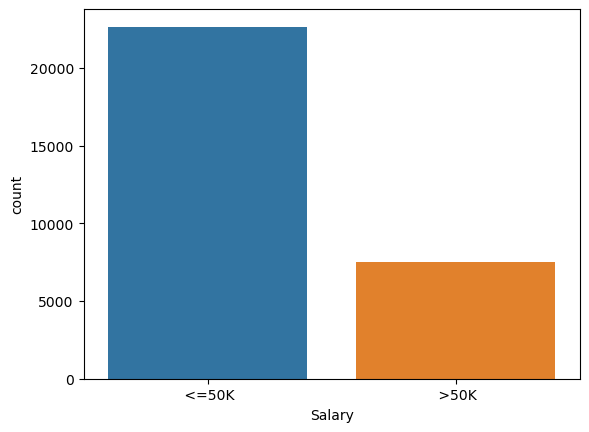

In [18]:
#for df1=======================================================================
sns.countplot(x='Salary',data=df1)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show
df1['Salary'].value_counts()


Salary
 <=50K    11360
 >50K      3700
Name: count, dtype: int64

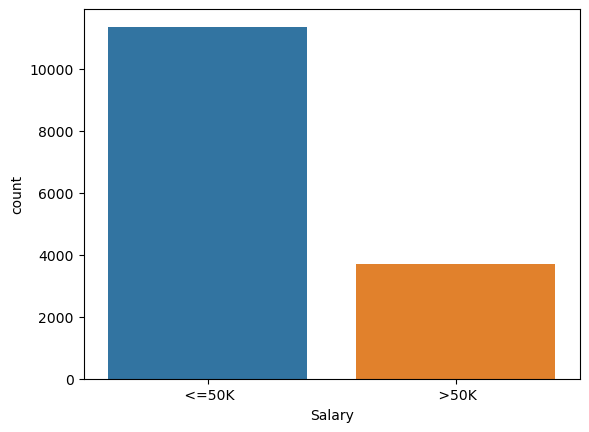

In [19]:
# for df2======================================================================
sns.countplot(x='Salary',data=df2)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show
df2['Salary'].value_counts()

<Axes: xlabel='education'>

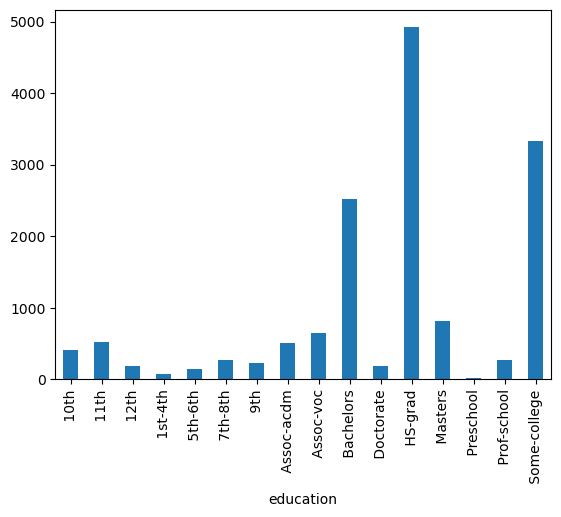

In [20]:
pd.crosstab(df1['Salary'],df1['education']).mean().plot(kind='bar')


<Axes: xlabel='hoursperweek'>

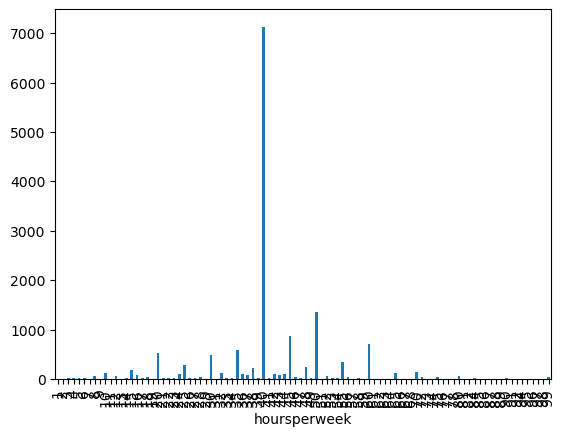

In [21]:
pd.crosstab(df1['Salary'],df1['hoursperweek']).mean().plot(kind='bar')


<Axes: xlabel='occupation'>

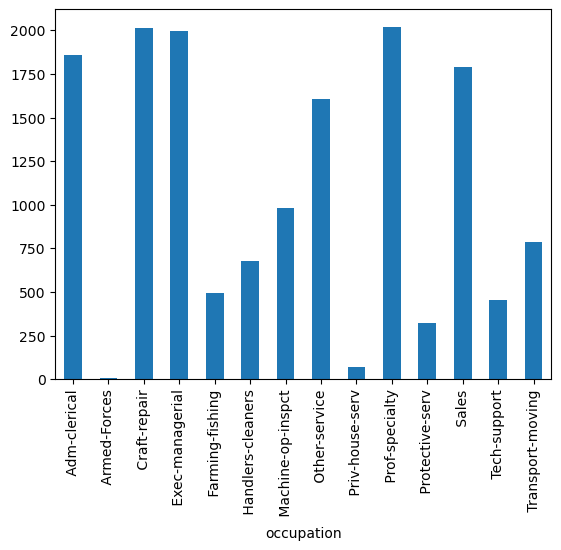

In [22]:
pd.crosstab(df1['Salary'],df1['occupation']).mean().plot(kind='bar')


<Axes: xlabel='workclass'>

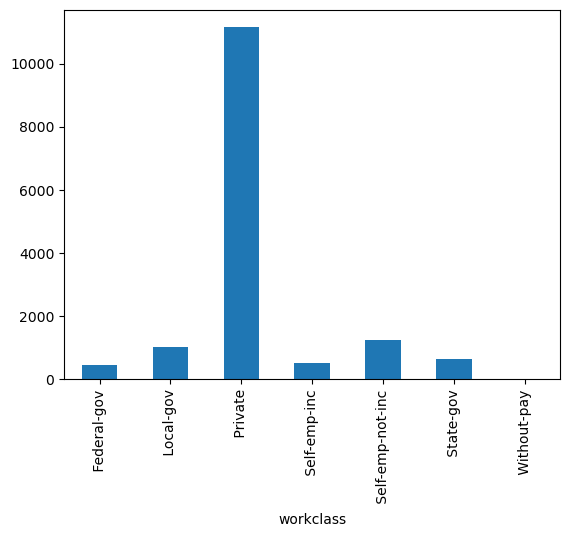

In [23]:
pd.crosstab(df1['Salary'],df1['workclass']).mean().plot(kind='bar')


In [24]:
#transforming the data=======================================
object_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native","Salary"]

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

for i in  object_columns:
    df1[i]=le.fit_transform(df1[i])
    df2[i]=le.fit_transform(df2[i])


In [25]:
df1.dtypes

age              int64
workclass        int64
education        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
Salary           int64
dtype: object

In [26]:
df2.dtypes


age              int64
workclass        int64
education        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
Salary           int64
dtype: object

In [27]:
#spliting the data=======
#Data partition
X_train= df1.iloc[:,1:13]
Y_train=df1.iloc[:,13]
X_test= df2.iloc[:,1:13]
Y_test=df2.iloc[:,13]


In [28]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [29]:
X_train = norm_func(X_train)
X_test =  norm_func(X_test)


In [30]:

# Model fitting with logistic

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

training_accuracies = []
test_accuracies = []

from sklearn.metrics import accuracy_score
for i in range(1,101):
    logreg.fit(X_train,Y_train)
    Y_pred_train  = logreg.predict(X_train)
    Y_pred_test   = logreg.predict(X_test)
    training_accuracies.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracies.append(accuracy_score(Y_test,Y_pred_test))
    
print("Cross validation Training Accuracy: ",np.mean(training_accuracies).round(2))
print("Cross validation Test Accuracy: ",np.mean(test_accuracies).round(2))


Cross validation Training Accuracy:  0.82
Cross validation Test Accuracy:  0.82


In [31]:
#did only to check the value
# Model fitting with knn
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=11)

training_accuracies = []
test_accuracies = []

from sklearn.metrics import accuracy_score
for i in range(1,101):
    KNN.fit(X_train,Y_train)
    Y_pred_train  = KNN.predict(X_train)
    Y_pred_test   = KNN.predict(X_test)
    training_accuracies.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracies.append(accuracy_score(Y_test,Y_pred_test))
    
print("Cross validation Training Accuracy: ",np.mean(training_accuracies).round(2))
print("Cross validation Test Accuracy: ",np.mean(test_accuracies).round(2))


Cross validation Training Accuracy:  0.85
Cross validation Test Accuracy:  0.83


In [32]:
# Model fitting with NaiveBayes Classifier
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

training_accuracies = []
test_accuracies = []

from sklearn.metrics import accuracy_score
for i in range(1,101):
    MNB.fit(X_train,Y_train)
    Y_pred_train  = MNB.predict(X_train)
    Y_pred_test   = MNB.predict(X_test)
    training_accuracies.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracies.append(accuracy_score(Y_test,Y_pred_test))
    
print("Cross validation Training Accuracy: ",np.mean(training_accuracies).round(2))
print("Cross validation Test Accuracy: ",np.mean(test_accuracies).round(2))


Cross validation Training Accuracy:  0.76
Cross validation Test Accuracy:  0.76


In [33]:
#performing roc



from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred_test)
cm


array([[11358,     2],
       [ 3618,    82]])

In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score:", accuracy_score(Y_test,Y_pred_test).round(2))
print("Sensitivity score:", recall_score(Y_test,Y_pred_test).round(2))
print("Precision score:", precision_score(Y_test,Y_pred_test).round(2))
print("F1 score:", f1_score(Y_test,Y_pred_test).round(2))
TN = cm[0,0]
FP = cm[1,0]
TNR = TN/(FP + TN)
print("Specificity score:", TNR.round(2))


Accuracy score: 0.76
Sensitivity score: 0.02
Precision score: 0.98
F1 score: 0.04
Specificity score: 0.76


In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


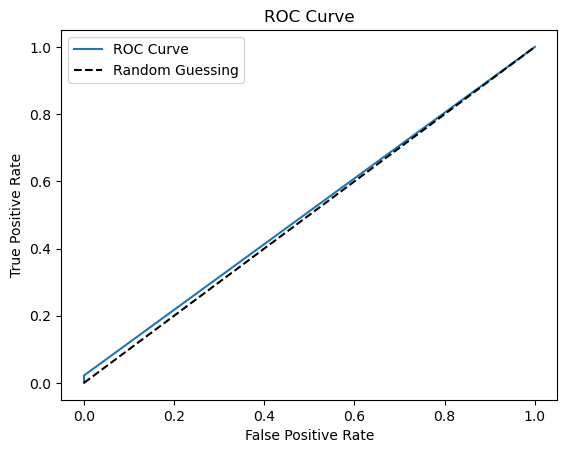

In [36]:
# Assuming y_true are the true labels and y_pred_prob are the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(Y_test,Y_pred_test)
roc_df=pd.DataFrame(zip(fpr,tpr,thresholds),columns=["FPR","TPR","Thres_V"])
roc_df
# Plot ROC curvez
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [37]:

# Calculate AUC
auc = roc_auc_score(Y_test,Y_pred_test)
print('AUC:', auc)


AUC: 0.510993052912067
